# BIGMART SALES

##### BigMart has been experiencing inconsistent sales performance across its outlets. Some stores have been struggling to meet their sales targets, while some stores have been exceeding expectations. Management wants to understand the factors contributing to these disparities so they can make informed decisions to boost overall sales and optimize their inventory.
##### BigMart needs to identify the key drivers of sales performance across different products and outlets. Specifically, they want to:
* Determine which products are top performers.
* Understand sales trends over the years.
* Compare sales performance across different outlet types and locations.
* Assess the impact of product visibility, type, and pricing on sales.
* Analyze how outlet size and location influence sales figures.

In [1]:
# Data wrangling library
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")

# Data Modeling library
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# load your data

df=pd.read_csv("Train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
#check your infomation

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
# check for missing values

df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
# handle missing value with the median

df['Item_Weight'].median()

12.6

In [6]:
# filling the missing values in the "Item_weight column" with the "Median" value

df['Item_Weight'].fillna(df['Item_Weight'].median(), inplace=True)

In [7]:
# handle missing value with the mode

df['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [8]:
# Filling the missing values in the "Outlet_Size column" with the "Mode" value

df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

In [9]:
# checking for missing values again

df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [10]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


## Sale Analysis

In [11]:
# Identify Top-Performing Products Based on Item_Outlet_Sales
# Group by Item_Identifier and sum the Item_Outlet_Sales

top_products = df.groupby('Item_Identifier')['Item_Outlet_Sales'].sum().sort_values(ascending=False)

# Get the top 10 performing products
top_10_products = top_products.head(10)

print(top_10_products)

Item_Identifier
FDY55    42661.8008
FDA15    41584.5364
FDZ20    40185.0248
FDF05    36555.7490
FDA04    35741.4756
FDK03    34843.9772
NCQ06    34680.1904
NCQ53    34508.4140
FDJ55    33531.0196
FDD44    32723.4042
Name: Item_Outlet_Sales, dtype: float64


### Key Insights
* The top-performing products by total sales are FDY55 has the highest total sales, followed by FDA15 and FDF05.
* These top products contribute significantly to the overall sales.

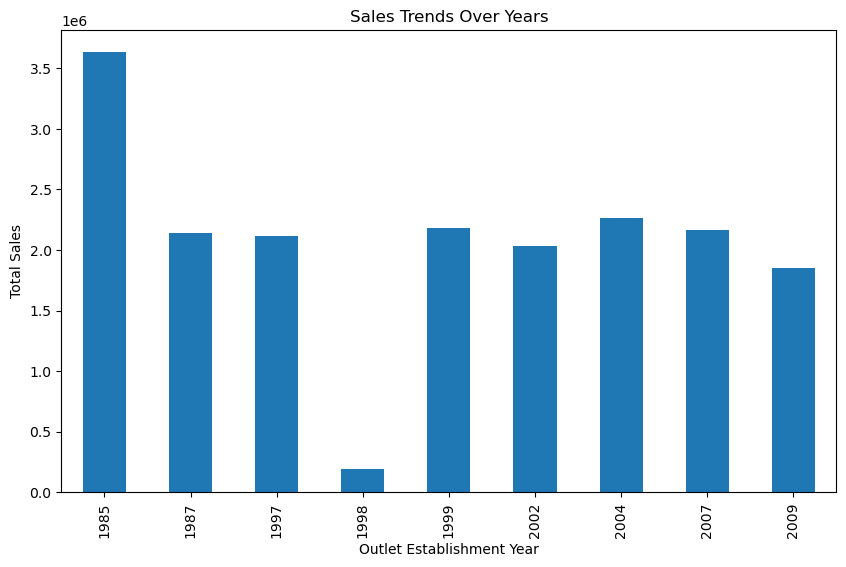

In [19]:
# Analyze Sales Trends Over the Years
# Group by Outlet_Establishment_Year and sum the Item_Outlet_Sales

sales_trends = df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].sum()

# Plotting the sales trends
plt.figure(figsize=(10, 6))
sales_trends.plot(kind='bar')
plt.title('Sales Trends Over Years')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.show()

### Key Insights
* Sales peaked in 1985 and have varied significantly in subsequent years.
* There is a noticeable dip in sales for outlets established in 1998.
* The spike in 1985 could indicate a period when BigMart had fewer outlets, leading to higher sales concentration in those stores.
* The dip in 1998 could suggest that the outlets established in that year faced challenges such as poor location, competition, or economic factors impacting sales.

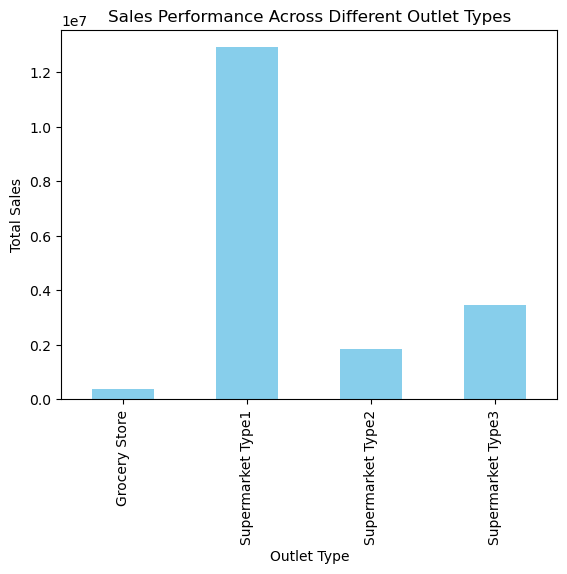

In [21]:
# compare Sales Performance Across Different Outlet Types
# Group by Outlet_Type and sum the Item_Outlet_Sales
sales_by_outlet_type = df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum()

# Plotting the sales performance across different outlet types
plt.figure(figsize=(10, 6))
sales_by_outlet_type.plot(kind='bar', color='skyblue')
plt.title('Sales Performance Across Different Outlet Types')
plt.xlabel('Outlet Type')
plt.ylabel('Total Sales')
plt.show()

### Key Insights
* Supermarket Type1 has the highest total sales, followed by Supermarket Type3 and Supermarket Type2.
* Grocery Stores have the lowest total sales.
* Larger supermarkets (Type1) perform significantly better in terms of sales compared to smaller grocery stores. This might be due to a wider product range, better facilities, or stronger brand presence.
* Supermarket Type3 and Type2 also perform well, indicating that larger format stores are generally more successful.

## Product Performance

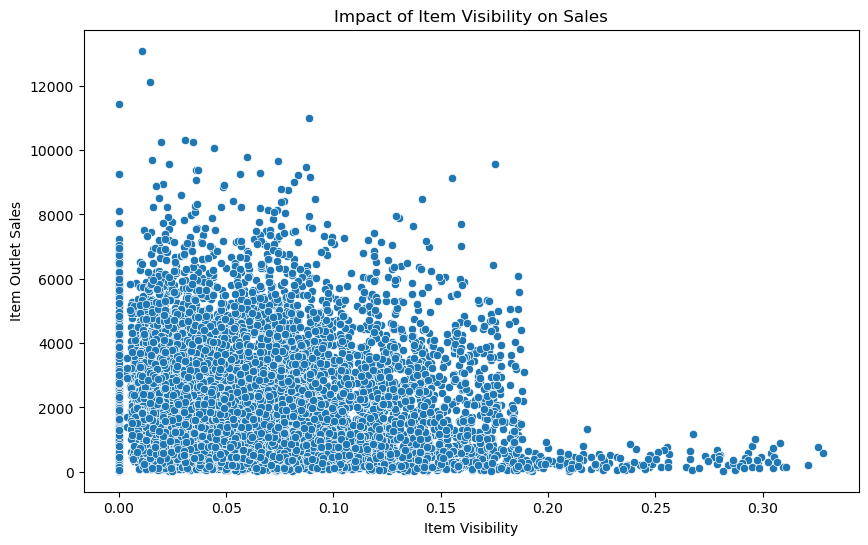

Correlation between Item Visibility and Item Outlet Sales: -0.1286246122207703


In [23]:
# Assess the Impact of Item_Visibility on Sales
# Scatter plot of Item_Visibility vs. Item_Outlet_Sales

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', data=df)
plt.title('Impact of Item Visibility on Sales')
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')
plt.show()

# Calculate the correlation coefficient

correlation_visibility_sales = np.corrcoef(df['Item_Visibility'], df['Item_Outlet_Sales'])[0, 1]
print(f"Correlation between Item Visibility and Item Outlet Sales: {correlation_visibility_sales}")

### Key Insights
* The scatter plot shows that as Item Visibility increases, the Item Outlet Sales tend to decrease.
* The correlation coefficient between Item Visibility and Item Outlet Sales is -0.1286, indicating a weak negative correlation.
* Items that are less visible tend to have higher sales. This could mean that highly visible items are not necessarily attracting more customers.
* Strategic placement and marketing are needed for items with higher visibility to improve their sales.

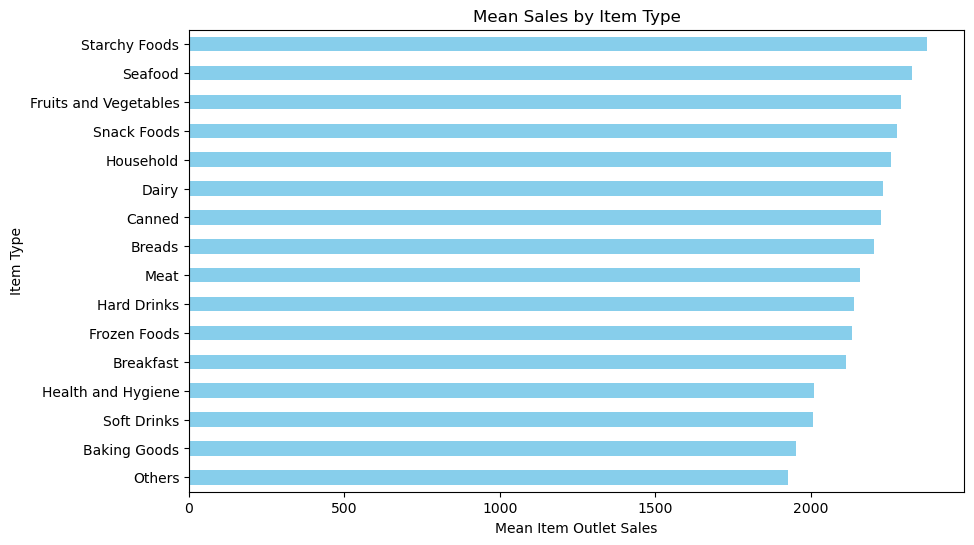

In [34]:
# Analyze How Item_Type Influences Sales Figures
# Group by Item_Type and calculate the mean Item_Outlet_Sales

sales_by_item_type = df.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values()

# Bar plot of mean Item_Outlet_Sales by Item_Type

plt.figure(figsize=(10, 6))
sales_by_item_type.plot(kind='barh', color='skyblue')
plt.title('Mean Sales by Item Type')
plt.xlabel('Mean Item Outlet Sales')
plt.ylabel('Item Type')
plt.show()

### Key Insights
* The bar plot shows that Starchy Foods, Seafood, and Fruits and Vegetables have the highest mean sales, while categories like Baking Goods and Others have the lowest mean sales.
* Certain product categories are more popular and contribute more to sales, indicating customer preferences and consumption patterns.
* Categories with lower sales might need more promotional efforts or reassessment of their product offerings.

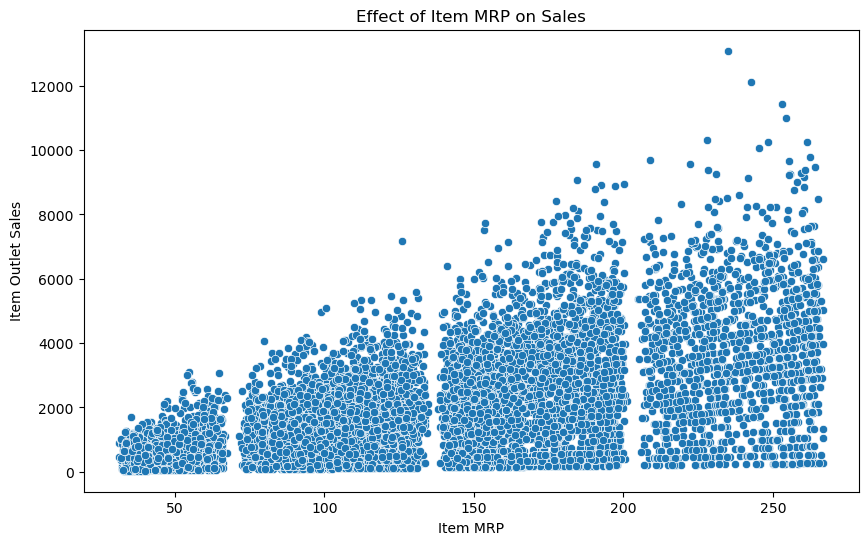

Correlation between Item MRP and Item Outlet Sales: 0.5675744466569194


In [26]:
# Evaluate the Effect of Item_MRP on Item_Outlet_Sales
# Scatter plot of Item_MRP vs. Item_Outlet_Sales

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=df)
plt.title('Effect of Item MRP on Sales')
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.show()

# Calculate the correlation coefficient
correlation_mrp_sales = np.corrcoef(df['Item_MRP'], df['Item_Outlet_Sales'])[0, 1]
print(f"Correlation between Item MRP and Item Outlet Sales: {correlation_mrp_sales}")

### Key Insights
* The scatter plot shows that higher MRP (Maximum Retail Price) items generally have higher sales, although there is significant variation.
* The correlation coefficient between Item MRP and Item Outlet Sales is 0.5677, indicating a moderate positive correlation.
* Higher-priced items tend to sell more, which suggests that customers perceive value in these products or that they belong to categories with high demand.
* The variation indicates that while price is a factor, other elements like quality, brand, and necessity also play roles in driving sales.

# Outlet Analysis

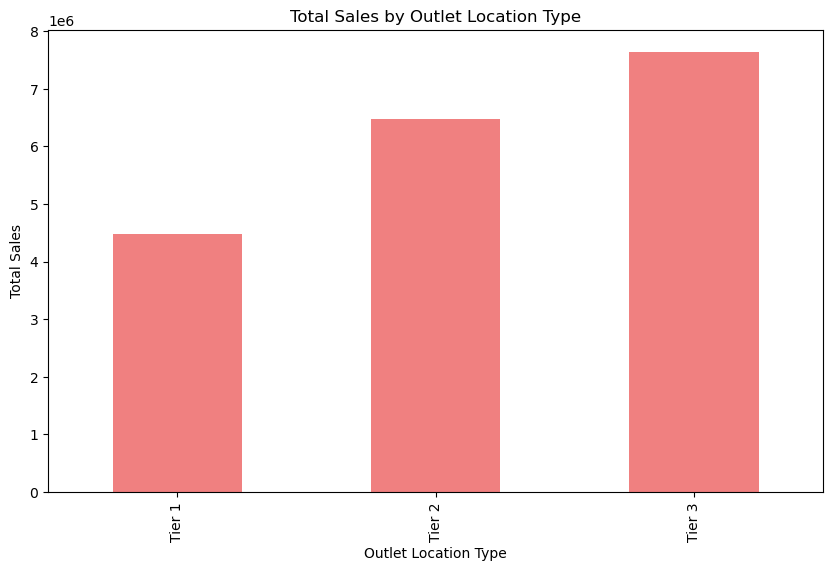

In [30]:
# Compare sales performance across different Outlet_Location_Type and outlet_sales

sales_by_location_type = df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum()

plt.figure(figsize=(10, 6))
sales_by_location_type.plot(kind='bar', color='lightcoral')
plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')
plt.show()

### Key Insights
* The bar plot shows that Tier 3 locations have the highest total sales, followed by Tier 2, with Tier 1 locations having the lowest total sales.
* Outlets in Tier 3 locations are performing the best in terms of sales. This could be due to various factors such as higher population density, better customer reach, or more favorable market conditions in these areas.
* Tier 1 locations, despite being in prime areas, have the lowest sales. This might indicate higher competition, higher operating costs, or customer preferences shifting to other areas.

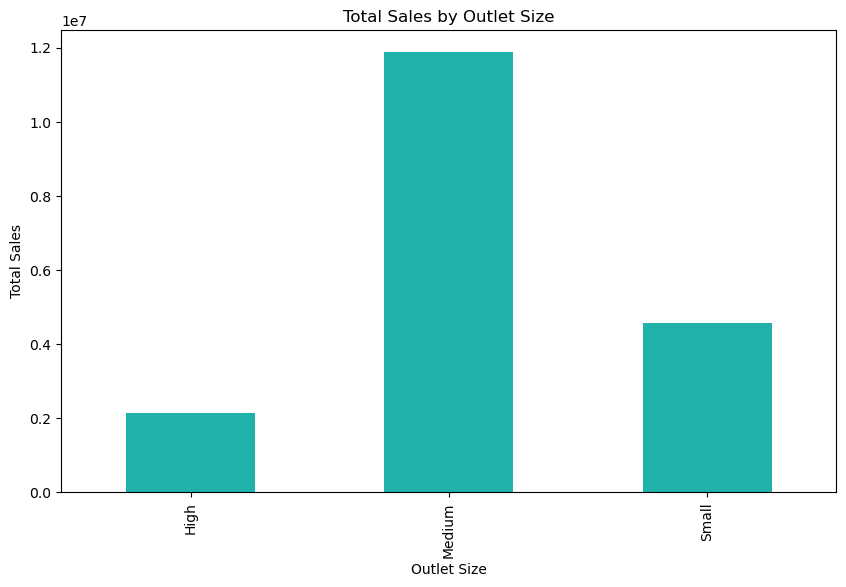

In [32]:
# Compare sales performance across different Outlet_Size

sales_by_outlet_size = df.groupby('Outlet_Size')['Item_Outlet_Sales'].sum()

plt.figure(figsize=(10, 6))
sales_by_outlet_size.plot(kind='bar', color='lightseagreen')
plt.title('Total Sales by Outlet Size')
plt.xlabel('Outlet Size')
plt.ylabel('Total Sales')
plt.show()

### Key Insights
* The bar plot shows that outlets of Medium size have the highest total sales, followed by Small and then High size outlets.
* Medium size outlets are performing the best in terms of sales. This could be due to an optimal balance between product variety and shopping convenience.
* High size outlets, despite having the potential for a larger inventory and customer capacity, have the lowest sales. This might be due to higher maintenance costs, less efficient use of space, or customer preference for more manageable shopping experiences.

# Recommendation
* Focus on Medium-Sized Outlets, Medium-sized outlets have the highest sales. They strike a good balance between product variety and shopping convenience. Consider expanding or optimizing these outlets to maximize sales.
* Invest in Tier 3 Locations, Tier 3 locations have shown the highest total sales. There may be untapped potential in these areas due to lower competition and costs. Consider opening more outlets or increasing marketing efforts in these locations.
* Improve Performance in Tier 1 Locations, Despite being in prime areas, Tier 1 locations have the lowest sales. Look into factors such as competition, customer preferences, and operating costs. Implement targeted marketing and promotions to attract more customers.
* Optimize Large Outlets, Large outlets have the lowest sales despite their potential for high inventory. Optimize space usage and improve store layout and customer service. Evaluate if these outlets are in the best locations and if they need restructuring.
* Enhance Product Visibility, Although Item Visibility has a minor impact on sales, ensure products are well-displayed and easily accessible to customers. Better product visibility can enhance the shopping experience.

# Conclusion
* Medium-sized outlets in Tier 3 locations are performing the best in terms of sales.
* Large outlets and those in Tier 1 locations need optimization and targeted strategies to improve their performance.
* Product visibility, item type, and pricing have varying impacts on sales, with some products performing better than others.